In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import random

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import yfinance as yf

In [3]:
df = pd.read_csv("https://query.data.world/s/pzd7uazpmpyortmg6fsuxiaoizllgu?dws=00000", encoding='ISO-8859-1')
display(df.head())

,Public Company Name (As Listed on Exchange),B Corp Impact Data ID,Ticker 1,Ticker 2,Ticker 3,IPO Year,Year Delisted,Year Certified,Public Listing Status,Year Decertified
0,"Allbirds, Inc.",001C000001SGhnyIAD,NASDAQGS:BIRD,NaN,NaN,2021.0,NaN,2016.0,active,NaN
1,Amalgamated Financial,001C000001K16JSIAZ,NASDAQGM:AMAL,NaN,NaN,2018.0,NaN,2017.0,active,NaN
2,"AppHarvest, Inc.",0013b00001o41JFAAY,NASDAQGS:APPH,NaN,NaN,2020.0,NaN,2019.0,delisted,2023.0
3,Arezzo&Co,0013b00001qHFddAAG,BOVESPA:ARZZ3,NaN,NaN,2011.0,NaN,2022.0,active,NaN
4,Arowana International,001C000001ZzPK4IAN,ASX: AWN,NaN,NaN,2013.0,2021.0,2018.0,delisted,NaN


In [4]:
df.drop(['B Corp Impact Data ID', 'Ticker 2', 'Ticker 3'], axis=1, inplace = True)
print(len(df))
df.dropna(axis=0, subset=['Public Company Name (As Listed on Exchange)'], inplace=True)
print(len(df))

999
68


In [5]:
display(df[df['Public Listing Status'] == 'delisted'])

,Public Company Name (As Listed on Exchange),Ticker 1,IPO Year,Year Delisted,Year Certified,Public Listing Status,Year Decertified
2,"AppHarvest, Inc.",NASDAQGS:APPH,2020.0,NaN,2019.0,delisted,2023.0
4,Arowana International,ASX: AWN,2013.0,2021.0,2018.0,delisted,NaN
14,Freshlocal Solutions,TSE: LOCL,2019.0,2021.0,2013.0,delisted,NaN


In [6]:
temp = df.copy()
temp = temp[temp['Public Listing Status'] == 'active']
temp['Exchange'] = temp['Ticker 1'].str.split(":").str[0]
temp['Ticker'] = temp['Ticker 1'].str.split(":").str[1]
display(temp.head(15))

,Public Company Name (As Listed on Exchange),Ticker 1,IPO Year,Year Delisted,Year Certified,Public Listing Status,Year Decertified,Exchange,Ticker
0,"Allbirds, Inc.",NASDAQGS:BIRD,2021.0,NaN,2016.0,active,NaN,NASDAQGS,BIRD
1,Amalgamated Financial,NASDAQGM:AMAL,2018.0,NaN,2017.0,active,NaN,NASDAQGM,AMAL
3,Arezzo&Co,BOVESPA:ARZZ3,2011.0,NaN,2022.0,active,NaN,BOVESPA,ARZZ3
5,Australian Ethical Investment Ltd.,ASX:AEF,2002.0,NaN,2014.0,active,NaN,ASX,AEF
6,Benefit Systems S.A.,WSE:BFT,2013.0,NaN,2018.0,active,NaN,WSE,BFT
7,Biome Australia,ASX:BIO,2021.0,NaN,2021.0,active,NaN,ASX,BIO
8,Cafe Direct,ETHEX,NaN,NaN,2018.0,active,NaN,ETHEX,NaN
9,"Charlotte's Web Holdings, Inc.",TSX:CWEB,2018.0,NaN,2020.0,active,NaN,TSX,CWEB
10,ClearSale S.A.,BOVESPA:CLSA3,2021.0,NaN,2021.0,active,NaN,BOVESPA,CLSA3
11,Condor Technologies NV,ENXTPA:MLMFI,2014.0,NaN,2022.0,active,NaN,ENXTPA,MLMFI


In [7]:
exchanges = set(temp['Exchange'])
print(exchanges)
us_ex = ['NYSE', 'NASDAQGS','NASDAQGM', 'NASDAQCM']

{'BVMF', 'BVL', 'TASE', 'TSE', 'OTC-X', 'Through auction', 'TSX', 'ENXTPA', 'NZSE', 'NASDAQCM', 'XMIL', 'NASDAQGS', 'OM', 'WSE', 'NYSE', 'MOVIDA B3', 'KLSE', 'TWSE', 'NASDAQGM', 'XSGO', 'HKG', 'BIT', 'NSX', 'SGX', 'ETHEX', 'NZE', 'LON', 'ALAMA.PA', 'BME', 'ENXTBR', 'MIL', 'SNSE', 'BOVESPA', 'BRK', 'LSE', 'ASX'}


In [8]:
us = temp[temp['Exchange'].isin(us_ex)]

In [9]:
print(len(us))
display(us)

10


,Public Company Name (As Listed on Exchange),Ticker 1,IPO Year,Year Delisted,Year Certified,Public Listing Status,Year Decertified,Exchange,Ticker
0,"Allbirds, Inc.",NASDAQGS:BIRD,2021.0,NaN,2016.0,active,NaN,NASDAQGS,BIRD
1,Amalgamated Financial,NASDAQGM:AMAL,2018.0,NaN,2017.0,active,NaN,NASDAQGM,AMAL
12,Coursera,NYSE:COUR,2021.0,NaN,2021.0,active,NaN,NYSE,COUR
17,"Grove Collaborative Holdings, Inc.",NYSE:GROV,2022.0,NaN,2014.0,active,NaN,NYSE,GROV
27,"Lemonade, Inc.",NYSE:LMND,2020.0,NaN,2016.0,active,NaN,NYSE,LMND
39,"The Vita Coco Company, Inc.",NASDAQGS:COCO,2021.0,NaN,2021.0,active,NaN,NASDAQGS,COCO
44,"Vital Farms, Inc.",NASDAQGM:VITL,2020.0,NaN,2015.0,active,NaN,NASDAQGM,VITL
45,VivoPower International PLC,NASDAQCM:VVPR,2016.0,NaN,2018.0,active,NaN,NASDAQCM,VVPR
47,Warby Parker Inc.,NYSE:WRBY,2021.0,NaN,2011.0,active,NaN,NYSE,WRBY
49,Zevia PBC,NYSE:ZVIA,2021.0,NaN,2021.0,active,NaN,NYSE,ZVIA


In [10]:
add_subs = True
public_subs = ['UL', 'PG', 'BUD', 'KO', 'GPS', 'OPY', 'HAIN', 'DANOY']

In [11]:
def get_stock_data (df):
    tickers_list = df['Ticker'].tolist()
    if add_subs:
        tickers_list = tickers_list + public_subs
    tickers_data= {}
    
    for ticker in tickers_list:
        ticker_object = yf.Ticker(ticker)

        #convert info() output from dictionary to dataframe
        temp = pd.DataFrame.from_dict(ticker_object.info, orient="index")
        temp.reset_index(inplace=True)
        temp.columns = ["Attribute", "Recent"]

        # add (ticker, dataframe) to main dictionary
        tickers_data[ticker] = temp

    return tickers_data
        
        

In [12]:
yf_data = get_stock_data (us)


Attributes = ['address1',
 'city',
 'state',
 'zip',
 'country',
 'phone',
 'website',
 'industry',
 'industryKey',
 'industryDisp',
 'sector',
 'sectorKey',
 'sectorDisp',
 'longBusinessSummary',
 'fullTimeEmployees',
 'companyOfficers',
 'auditRisk',
 'boardRisk',
 'compensationRisk',
 'shareHolderRightsRisk',
 'overallRisk',
 'governanceEpochDate',
 'compensationAsOfEpochDate',
 'maxAge',
 'priceHint',
 'previousClose',
 'open',
 'dayLow',
 'dayHigh',
 'regularMarketPreviousClose',
 'regularMarketOpen',
 'regularMarketDayLow',
 'regularMarketDayHigh',
 'beta',
 'forwardPE',
 'volume',
 'regularMarketVolume',
 'averageVolume',
 'averageVolume10days',
 'averageDailyVolume10Day',
 'bid',
 'ask',
 'bidSize',
 'askSize',
 'marketCap',
 'fiftyTwoWeekLow',
 'fiftyTwoWeekHigh',
 'priceToSalesTrailing12Months',
 'fiftyDayAverage',
 'twoHundredDayAverage',
 'currency',
 'enterpriseValue',
 'profitMargins',
 'floatShares',
 'sharesOutstanding',
 'sharesShort',
 'sharesShortPriorMonth',
 'sharesShortPreviousMonthDate',
 'dateShortInterest',
 'sharesPercentSharesOut',
 'heldPercentInsiders',
 'heldPercentInstitutions',
 'shortRatio',
 'shortPercentOfFloat',
 'impliedSharesOutstanding',
 'bookValue',
 'priceToBook',
 'lastFiscalYearEnd',
 'nextFiscalYearEnd',
 'mostRecentQuarter',
 'netIncomeToCommon',
 'trailingEps',
 'forwardEps',
 'pegRatio',
 'enterpriseToRevenue',
 'enterpriseToEbitda',
 '52WeekChange',
 'SandP52WeekChange',
 'exchange',
 'quoteType',
 'symbol',
 'underlyingSymbol',
 'shortName',
 'longName',
 'firstTradeDateEpochUtc',
 'timeZoneFullName',
 'timeZoneShortName',
 'uuid',
 'messageBoardId',
 'gmtOffSetMilliseconds',
 'currentPrice',
 'targetHighPrice',
 'targetLowPrice',
 'targetMeanPrice',
 'targetMedianPrice',
 'recommendationMean',
 'recommendationKey',
 'numberOfAnalystOpinions',
 'totalCash',
 'totalCashPerShare',
 'ebitda',
 'totalDebt',
 'quickRatio',
 'currentRatio',
 'totalRevenue',
 'debtToEquity',
 'revenuePerShare',
 'returnOnAssets',
 'returnOnEquity',
 'freeCashflow',
 'operatingCashflow',
 'revenueGrowth',
 'grossMargins',
 'ebitdaMargins',
 'operatingMargins',
 'financialCurrency',
 'trailingPegRatio']

In [13]:
combined_data = pd.concat(yf_data)
combined_data = combined_data.reset_index()

del combined_data["level_1"] # clean up unnecessary column
combined_data.columns = ["Ticker", "Attribute", "Recent"] # update column names


In [14]:
attr_to_keep = ['industry', 'sector','previousClose', 
               'marketCap', 'sharesOutstanding']

In [15]:
filtered = combined_data[combined_data["Attribute"].isin(attr_to_keep)].reset_index()
del filtered["index"] # clean up unnecessary column


In [16]:
display(filtered.head(50))

,Ticker,Attribute,Recent
0,BIRD,industry,Apparel Retail
1,BIRD,sector,Consumer Cyclical
2,BIRD,previousClose,0.7005
3,BIRD,marketCap,116003768
4,BIRD,sharesOutstanding,102641000
5,AMAL,industry,Banks - Regional
6,AMAL,sector,Financial Services
7,AMAL,previousClose,23.75
8,AMAL,marketCap,722157504
9,AMAL,sharesOutstanding,30509400


In [17]:
def get_price_history (df, start, end, add_subs = False):
    tickers_list = df['Ticker'].tolist()
    if add_subs:
        tickers_list = tickers_list + public_subs

    tickers_data= {}
    first_object = yf.Ticker(tickers_list[0])
    prices = pd.DataFrame.from_dict(first_object.history(start=start, end=end, interval = "1d"))
    prices.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
    prices.columns = [tickers_list[0]]
    
    for ticker in tickers_list[1:]:
        ticker_object = yf.Ticker(ticker)
        temp = pd.DataFrame.from_dict(ticker_object.history(start=start, end=end, interval = "1d"))
        temp.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
        temp.columns = [ticker]
        prices = prices.merge(temp, how="outer", left_index=True, right_index=True)

    return prices

In [18]:
px_df = get_price_history(us, start="2022-01-01", end = "2024-02-23")
spx_object = yf.Ticker("^GSPC")
spx = pd.DataFrame.from_dict(spx_object.history(start="2022-01-01", end="2024-02-23", interval = "1d"))
spx

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,4778.140137,4796.640137,4758.169922,4796.560059,3831020000,0.0,0.0
2022-01-04 00:00:00-05:00,4804.509766,4818.620117,4774.270020,4793.540039,4683170000,0.0,0.0
2022-01-05 00:00:00-05:00,4787.990234,4797.700195,4699.439941,4700.580078,4887960000,0.0,0.0
2022-01-06 00:00:00-05:00,4693.390137,4725.009766,4671.259766,4696.049805,4295280000,0.0,0.0
2022-01-07 00:00:00-05:00,4697.660156,4707.950195,4662.740234,4677.029785,4181510000,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-15 00:00:00-05:00,5003.140137,5032.720215,4999.439941,5029.729980,4137970000,0.0,0.0
2024-02-16 00:00:00-05:00,5031.129883,5038.700195,4999.520020,5005.569824,3833270000,0.0,0.0
2024-02-20 00:00:00-05:00,4989.319824,4993.709961,4955.020020,4975.509766,4034880000,0.0,0.0


In [19]:
def add_shares_out (df, add_subs = False):
    df['BIRD_SharesOut'] = 152850000
    df['BIRD_MktCap'] = df['BIRD_SharesOut'] * df['BIRD']

    df['AMAL_SharesOut'] = 30430000
    df['AMAL_MktCap'] = df['AMAL_SharesOut'] * df['AMAL']

    df['COUR_SharesOut'] = 156950000
    df['COUR_MktCap'] = df['COUR_SharesOut'] * df['COUR']

    df['GROV_SharesOut'] = 37450000
    df['GROV_MktCap'] = df['GROV_SharesOut'] * df['GROV']

    df['LMND_SharesOut'] = 69920000
    df['LMND_MktCap'] = df['LMND_SharesOut'] * df['LMND']

    df['COCO_SharesOut'] = 56800000
    df['COCO_MktCap'] = df['COCO_SharesOut'] * df['COCO']

    df['VITL_SharesOut'] = 41600000
    df['VITL_MktCap'] = df['VITL_SharesOut'] * df['VITL']

    df['VVPR_SharesOut'] = 3270000
    df['VVPR_MktCap'] = df['VVPR_SharesOut'] * df['VVPR']

    df['WRBY_SharesOut'] = 117640000
    df['WRBY_MktCap'] = df['WRBY_SharesOut'] * df['WRBY']

    df['ZVIA_SharesOut'] = 50410000
    df['ZVIA_MktCap'] = df['ZVIA_SharesOut'] * df['ZVIA']


    if add_subs:
        df['UL_SharesOut'] = 2499020000
        df['UL_MktCap'] = df['UL_SharesOut'] * df['UL']

        df['PG_SharesOut'] = 2353020000
        df['PG_MktCap'] = df['PG_SharesOut'] * df['PG']

        df['BUD_SharesOut'] = 1986770000
        df['BUD_MktCap'] = df['BUD_SharesOut'] * df['BUD']

        df['KO_SharesOut'] = 4312460000
        df['KO_MktCap'] = df['KO_SharesOut'] * df['KO']


        df['GPS_SharesOut'] = 370830000 
        df['GPS_MktCap'] = df['GPS_SharesOut'] * df['GPS']


        df['OPY_SharesOut'] = 10290000
        df['OPY_MktCap'] = df['OPY_SharesOut'] * df['OPY']


        df['HAIN_SharesOut'] = 89830000
        df['HAIN_MktCap'] = df['HAIN_SharesOut'] * df['HAIN']


        df['DANOY_SharesOut'] = 2499020000
        df['DANOY_MktCap'] = df['DANOY_SharesOut'] * df['DANOY']
        
    col_order = df.columns.sort_values().tolist()
    df = df[col_order]
    
    return df


In [20]:
#col_order = px_df.columns.sort_values().tolist()
#px_df = px_df[col_order]


In [21]:
#px_df.to_csv('Public_B_Corps.csv')

In [22]:
def calc_index(df, divisor = 1000000000):
    cols = df.columns
    mkt_cap_cols = []
    for col in cols:
        if "MktCap" in col:
            mkt_cap_cols.append(col)
    
    mkt_cap_df = df[mkt_cap_cols].copy()
    
    # Sort by beginning mkt cap
    baseline_order = mkt_cap_df.iloc[0,:].sort_values(ascending=False)
    baseline_all = baseline_order.index.to_list()
    
    mkt_cap_df['Total_Index'] = mkt_cap_df[baseline_all].sum(axis=1)/divisor
    
    return mkt_cap_df

In [23]:
def separate_subs (df, show_chart = True):

    px0 = get_price_history(df, start="2022-01-01", end = "2024-02-23", add_subs = True)
    px0 = add_shares_out(px0, add_subs = True)
    #px0.to_csv('24_03_19_BCorp_Index.csv')
    mkt_cap0 = calc_index(px0, divisor = 100000000)
    index0 = mkt_cap0[['Total_Index']]
    normed_data0 = index0.copy()
    normed_data0 = normed_data0.div(normed_data0.iloc[0]).fillna(0)


    px1 = get_price_history(df, start="2022-01-01", end = "2024-02-23", add_subs = False)
    px1 = add_shares_out(px1, add_subs = False)
    mkt_cap1 = calc_index(px1, divisor = 10000000)
    index1 = mkt_cap1[['Total_Index']]
    normed_data1 = index1.copy()
    normed_data1 = normed_data1.div(normed_data1.iloc[0]).fillna(0)
    
    # Add SPX:
    normed_spx = spx['Close'].copy()
    normed_spx = normed_spx.div(normed_spx.iloc[0]).fillna(0)
    
    if show_chart:
        fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize = (20,18))
        ax0.plot(normed_data0, color = 'seagreen', linewidth=2, label = 'With Subs')
        ax0.legend(loc=3)
        ax1.plot(normed_data1, color = 'royalblue', linewidth=2,label='Cert B Corps')
        ax1.legend(loc=3)
        ax2.plot(normed_data0, color = 'seagreen', linewidth=2, label = 'With Subs')
        ax2.plot(normed_data1, color = 'royalblue', linewidth=2, label = 'Cert B Corps')
        ax2.plot(normed_spx, color='darkorange', linewidth=2, label = 'SPX')
        ax2.legend(loc=3)
        plt.show()
        
    return px0, px1

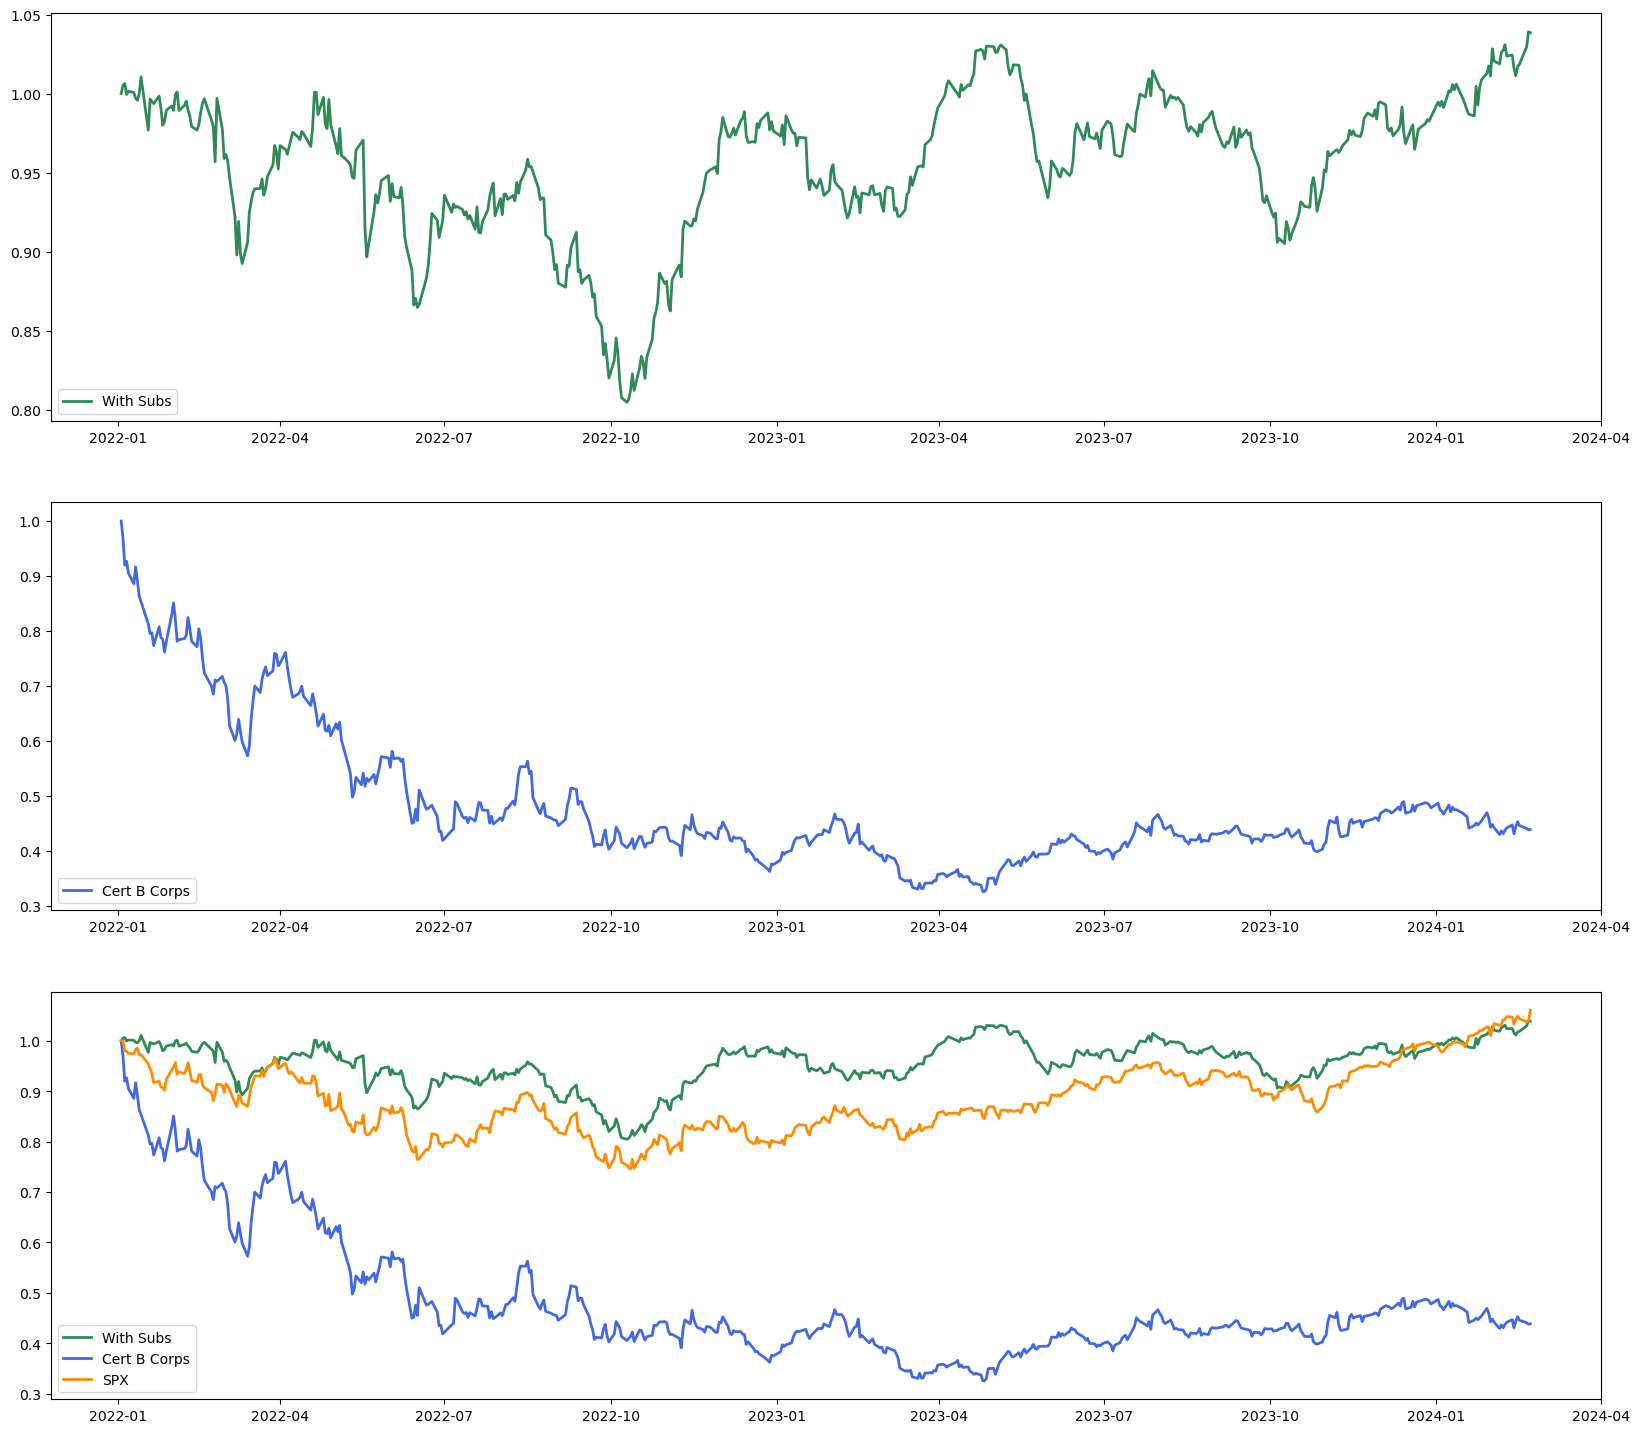

In [24]:
all_px, bcorp_px = separate_subs(us, show_chart = True)

In [25]:
all_px.to_csv("B_Corp_Stocks.csv")

## Construct a Subset - look at reweighting?

In [26]:
def determine_reweighting (df, n=8):
    cols = df.columns
    mkt_cap_cols = []
    for col in cols:
        if "MktCap" in col:
            mkt_cap_cols.append(col)
    mkt_cap_df = df[mkt_cap_cols].copy()
    
    # Sort by beginning mkt cap
    baseline_order = mkt_cap_df.iloc[0,:].sort_values(ascending=False)
    baseline_all = baseline_order.index.to_list()
    baseline_n = baseline_order.index[0:n].to_list()
    
    #Add Quarterly Flag
    mkt_cap_df['Quarter'] = mkt_cap_df.index.quarter
    
    mkt_cap_df['Reweight'] = mkt_cap_df['Quarter'] - mkt_cap_df['Quarter'].shift(periods=1)
    
    quarterly = mkt_cap_df[mkt_cap_df['Reweight'].isin([1,-3])]
    
    for i in range(quarterly.shape[0]):
        order = quarterly.iloc[i,:].sort_values(ascending=False)
        order_all = order.index.to_list()
        order_n = order.index[0:n].to_list()
        for j in order_n:
            if j not in baseline_n:
                print("Need to Reweight!", i, j)
                print("Baseline n", baseline_n)
                print("New n", order_n)
        baseline_n = order_n
    
    return quarterly
    #mkt_cap_df['Total_Index'] = mkt_cap_df[baseline_all].sum(axis=1)/10000000
    #mkt_cap_df['Total_Index_8'] = mkt_cap_df[baseline_8].sum(axis=1)/10000000

               

In [27]:
quarterly = determine_reweighting(us, n = 12)

AttributeError: 'Index' object has no attribute 'quarter'

### Visualization

#### Seaborn color maps:
‘Accent’, ‘Accent_r’, ‘Blues’, ‘Blues_r’, ‘BrBG’, ‘BrBG_r’, ‘BuGn’, ‘BuGn_r’, ‘BuPu’, ‘BuPu_r’, ‘CMRmap’, ‘CMRmap_r’, ‘Dark2’, ‘Dark2_r’, ‘GnBu’, ‘GnBu_r’, ‘Greens’, ‘Greens_r’, ‘Greys’, ‘Greys_r’, ‘OrRd’, ‘OrRd_r’, ‘Oranges’, ‘Oranges_r’, ‘PRGn’, ‘PRGn_r’, ‘Paired’, ‘Paired_r’, ‘Pastel1’, ‘Pastel1_r’, ‘Pastel2’, ‘Pastel2_r’, ‘PiYG’, ‘PiYG_r’, ‘PuBu’, ‘PuBuGn’, ‘PuBuGn_r’, ‘PuBu_r’, ‘PuOr’, ‘PuOr_r’, ‘PuRd’, ‘PuRd_r’, ‘Purples’, ‘Purples_r’, ‘RdBu’, ‘RdBu_r’, ‘RdGy’, ‘RdGy_r’, ‘RdPu’, ‘RdPu_r’, ‘RdYlBu’, ‘RdYlBu_r’, ‘RdYlGn’, ‘RdYlGn_r’, ‘Reds’, ‘Reds_r’, ‘Set1’, ‘Set1_r’, ‘Set2’, ‘Set2_r’, ‘Set3’, ‘Set3_r’, ‘Spectral’, ‘Spectral_r’, ‘Wistia’, ‘Wistia_r’, ‘YlGn’, ‘YlGnBu’, ‘YlGnBu_r’, ‘YlGn_r’, ‘YlOrBr’, ‘YlOrBr_r’, ‘YlOrRd’, ‘YlOrRd_r’, ‘afmhot’, ‘afmhot_r’, ‘autumn’, ‘autumn_r’, ‘binary’, ‘binary_r’, ‘bone’, ‘bone_r’, ‘brg’, ‘brg_r’, ‘bwr’, ‘bwr_r’, ‘cividis’, ‘cividis_r’, ‘cool’, ‘cool_r’, ‘coolwarm’, ‘coolwarm_r’, ‘copper’, ‘copper_r’, ‘crest’, ‘crest_r’, ‘cubehelix’, ‘cubehelix_r’, ‘flag’, ‘flag_r’, ‘flare’, ‘flare_r’, ‘gist_earth’, ‘gist_earth_r’, ‘gist_gray’, ‘gist_gray_r’, ‘gist_heat’, ‘gist_heat_r’, ‘gist_ncar’, ‘gist_ncar_r’, ‘gist_rainbow’, ‘gist_rainbow_r’, ‘gist_stern’, ‘gist_stern_r’, ‘gist_yarg’, ‘gist_yarg_r’, ‘gnuplot’, ‘gnuplot2’, ‘gnuplot2_r’, ‘gnuplot_r’, ‘gray’, ‘gray_r’, ‘hot’, ‘hot_r’, ‘hsv’, ‘hsv_r’, ‘icefire’, ‘icefire_r’, ‘inferno’, ‘inferno_r’, ‘jet’, ‘jet_r’, ‘magma’, ‘magma_r’, ‘mako’, ‘mako_r’, ‘nipy_spectral’, ‘nipy_spectral_r’, ‘ocean’, ‘ocean_r’, ‘pink’, ‘pink_r’, ‘plasma’, ‘plasma_r’, ‘prism’, ‘prism_r’, ‘rainbow’, ‘rainbow_r’, ‘rocket’, ‘rocket_r’, ‘seismic’, ‘seismic_r’, ‘spring’, ‘spring_r’, ‘summer’, ‘summer_r’, ‘tab10’, ‘tab10_r’, ‘tab20’, ‘tab20_r’, ‘tab20b’, ‘tab20b_r’, ‘tab20c’, ‘tab20c_r’, ‘terrain’, ‘terrain_r’, ‘turbo’, ‘turbo_r’, ‘twilight’, ‘twilight_r’, ‘twilight_shifted’, ‘twilight_shifted_r’, ‘viridis’, ‘viridis_r’, ‘vlag’, ‘vlag_r’, ‘winter’, ‘winter_r’